In [1]:
# Marathon Analysis Project
# This project analyzes ultramarathon race data from the dataset `TWO_CENTURIES_OF_UM_RACES.csv`, focusing on 50km and 50mi races in the USA in 2020. 
# The goal is to clean the dataset and perform exploratory data analysis to uncover insights about athlete performance, age distribution, and race popularity.

In [2]:
# import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [6]:
# Load the dataset
df = pd.read_csv('TWO_CENTURIES_OF_UM_MARATHON_RACES.csv')
df.head(10)

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
0,2018,06.01.2018,Selva Costera (CHI),50km,22,4:51:39 h,Tnfrc,CHI,1978.0,M,M35,10.286,0
1,2018,06.01.2018,Selva Costera (CHI),50km,22,5:15:45 h,Roberto Echeverría,CHI,1981.0,M,M35,9.501,1
2,2018,06.01.2018,Selva Costera (CHI),50km,22,5:16:44 h,Puro Trail Osorno,CHI,1987.0,M,M23,9.472,2
3,2018,06.01.2018,Selva Costera (CHI),50km,22,5:34:13 h,Columbia,ARG,1976.0,M,M40,8.976,3
4,2018,06.01.2018,Selva Costera (CHI),50km,22,5:54:14 h,Baguales Trail,CHI,1992.0,M,M23,8.469,4
5,2018,06.01.2018,Selva Costera (CHI),50km,22,6:25:01 h,NaN,ARG,1974.0,M,M40,7.792,5
6,2018,06.01.2018,Selva Costera (CHI),50km,22,6:28:00 h,Los Patagones,ARG,1979.0,F,W35,7.732,6
7,2018,06.01.2018,Selva Costera (CHI),50km,22,6:32:24 h,Reaktiva Chile,CHI,1967.0,F,W50,7.645,7
8,2018,06.01.2018,Selva Costera (CHI),50km,22,6:39:08 h,Puro Trail Osorno,CHI,1985.0,M,M23,7.516,8
9,2018,06.01.2018,Selva Costera (CHI),50km,22,6:45:11 h,Marlene Flores Team,CHI,1976.0,M,M40,7.404,9


In [7]:
# Check dataset shape
df.shape

(7461195, 13)

In [10]:
# Check data types
df.dtypes

Year of event                  int64
Event dates                   object
Event name                    object
Event distance/length         object
Event number of finishers      int64
Athlete performance           object
Athlete club                  object
Athlete country               object
Athlete year of birth        float64
Athlete gender                object
Athlete age category          object
Athlete average speed         object
Athlete ID                     int64
dtype: object

In [11]:
df2 = df[(df['Event distance/length'].isin(['50km', '50mi'])) &
             (df['Year of event'] == 2020) &
             (df['Event name'].str.split('(').str.get(1).str.split(')').str.get(0) == 'USA')]
df2.head(3)

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
2539945,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,3:17:55 h,"*Normandy Park, WA",USA,1991.0,M,M23,15.158,71287
2539946,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,4:02:32 h,"*Gold Bar, WA",USA,1981.0,M,M35,12.369,629508
2539947,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,4:07:57 h,"*Vashon, WA",USA,1999.0,M,MU23,12.099,64838


In [12]:
# Check filtered dataset shape
df2.shape

(26090, 13)

In [14]:
# Clean event names by removing country code
df2['Event name'] = df2['Event name'].str.split('(').str.get(0)
df2.head()

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
2539945,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,3:17:55 h,"*Normandy Park, WA",USA,1991.0,M,M23,15.158,71287
2539946,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:02:32 h,"*Gold Bar, WA",USA,1981.0,M,M35,12.369,629508
2539947,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:07:57 h,"*Vashon, WA",USA,1999.0,M,MU23,12.099,64838
2539948,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:22:02 h,"*Gig Harbor, WA",USA,1983.0,M,M35,11.449,704450
2539949,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:27:34 h,"*Bainbridge Island, WA",USA,1977.0,M,M40,11.212,810281


In [17]:
# Calculate athlete age
df2['athlete_age'] = 2020 - df2['Athlete year of birth'].astype(float).astype('Int64')
df2.head()

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID,athlete_age
2539945,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,3:17:55 h,"*Normandy Park, WA",USA,1991.0,M,M23,15.158,71287,29
2539946,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:02:32 h,"*Gold Bar, WA",USA,1981.0,M,M35,12.369,629508,39
2539947,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:07:57 h,"*Vashon, WA",USA,1999.0,M,MU23,12.099,64838,21
2539948,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:22:02 h,"*Gig Harbor, WA",USA,1983.0,M,M35,11.449,704450,37
2539949,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:27:34 h,"*Bainbridge Island, WA",USA,1977.0,M,M40,11.212,810281,43


In [18]:
# Clean athlete performance by removing 'h' suffix
df2['Athlete performance'] = df2['Athlete performance'].str.split(' ').str.get(0)
df2.head()

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID,athlete_age
2539945,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,3:17:55,"*Normandy Park, WA",USA,1991.0,M,M23,15.158,71287,29
2539946,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:02:32,"*Gold Bar, WA",USA,1981.0,M,M35,12.369,629508,39
2539947,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:07:57,"*Vashon, WA",USA,1999.0,M,MU23,12.099,64838,21
2539948,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:22:02,"*Gig Harbor, WA",USA,1983.0,M,M35,11.449,704450,37
2539949,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:27:34,"*Bainbridge Island, WA",USA,1977.0,M,M40,11.212,810281,43


In [19]:
# drop columns: Athlete Club, Athlete Country, Athlete year of birth, Athlete Age Category
df2 = df2.drop(['Athlete club', 'Athlete country', 'Athlete year of birth', 'Athlete age category'], axis = 1)
df2.head()

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete gender,Athlete average speed,Athlete ID,athlete_age
2539945,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,3:17:55,M,15.158,71287,29
2539946,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:02:32,M,12.369,629508,39
2539947,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:07:57,M,12.099,64838,21
2539948,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:22:02,M,11.449,704450,37
2539949,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:27:34,M,11.212,810281,43


In [20]:
# Check for null values
df2.isna().sum()

Year of event                  0
Event dates                    0
Event name                     0
Event distance/length          0
Event number of finishers      0
Athlete performance            0
Athlete gender                 0
Athlete average speed          0
Athlete ID                     0
athlete_age                  233
dtype: int64

In [ ]:
df2[df2['athlete_age'].isna() == 1]

In [22]:
# Drop rows with null values
df2 = df2.dropna()
df2.shape

(25857, 10)

In [24]:
# check for dupes 
df2[df2.duplicated()]

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete gender,Athlete average speed,Athlete ID,athlete_age


In [25]:
# reset index
= df2.reset_index(drop = True)
df2.head()

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete gender,Athlete average speed,Athlete ID,athlete_age
0,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,3:17:55,M,15.158,71287,29
1,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:02:32,M,12.369,629508,39
2,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:07:57,M,12.099,64838,21
3,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:22:02,M,11.449,704450,37
4,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:27:34,M,11.212,810281,43


In [26]:
# fix types

In [27]:
df2['athlete_age'] = df2['athlete_age'].astype(int)

In [28]:
df2['Athlete average speed'] = df2['Athlete average speed'].astype(float)

In [29]:
df2.dtypes

Year of event                  int64
Event dates                   object
Event name                    object
Event distance/length         object
Event number of finishers      int64
Athlete performance           object
Athlete gender                object
Athlete average speed        float64
Athlete ID                     int64
athlete_age                    int32
dtype: object

In [30]:
df2.head()

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete gender,Athlete average speed,Athlete ID,athlete_age
0,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,3:17:55,M,15.158,71287,29
1,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:02:32,M,12.369,629508,39
2,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:07:57,M,12.099,64838,21
3,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:22:02,M,11.449,704450,37
4,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:27:34,M,11.212,810281,43


In [33]:
# Rename columns for clarity
df2 = df2.rename(columns={
        'Year of event': 'year',
        'Event dates': 'event_date',
        'Event name': 'event_name',
        'Event distance/length': 'distance',
        'Event number of finishers': 'num_finishers',
        'Athlete performance': 'performance_time',
        'Athlete gender': 'gender',
        'Athlete average speed': 'avg_speed',
        'Athlete ID': 'athlete_id'})
df2.head()

,year,event_date,event_name,distance,num_finishers,performance_time,gender,avg_speed,athlete_id,athlete_age
0,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,3:17:55,M,15.158,71287,29
1,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:02:32,M,12.369,629508,39
2,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:07:57,M,12.099,64838,21
3,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:22:02,M,11.449,704450,37
4,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:27:34,M,11.212,810281,43


In [34]:
# Convert performance_time to seconds for numerical analysis

In [35]:
def time_to_seconds(time_str):
    try:
        h, m, s = map(int, time_str.split(':'))
        return h * 3600 + m * 60 + s
    except:
        return None

In [36]:
df2['performance_seconds'] = df2['performance_time'].apply(time_to_seconds)
df2 = df2.dropna(subset=['performance_seconds'])
df2['performance_seconds'] = df2['performance_seconds'].astype(int)
df2.head()

,year,event_date,event_name,distance,num_finishers,performance_time,gender,avg_speed,athlete_id,athlete_age,performance_seconds
0,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,3:17:55,M,15.158,71287,29,11875
1,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:02:32,M,12.369,629508,39,14552
2,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:07:57,M,12.099,64838,21,14877
3,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:22:02,M,11.449,704450,37,15722
4,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:27:34,M,11.212,810281,43,16054


In [37]:
## Exploratory Data Analysis

In [38]:
# Summary statistics
df2[['athlete_age', 'avg_speed', 'performance_seconds', 'num_finishers']].describe()

,athlete_age,avg_speed,performance_seconds,num_finishers
count,25857.000000,25857.000000,25857.000000,25857.000000
mean,41.883591,7.436914,28978.520671,123.163360
std,10.724136,1.708379,9861.063469,131.515956
min,9.000000,1.541000,10143.000000,2.000000
25%,34.000000,6.257000,22192.000000,44.000000
50%,41.000000,7.223000,26520.000000,78.000000
75%,49.000000,8.396000,33392.000000,158.000000
max,85.000000,17.746000,133495.000000,636.000000


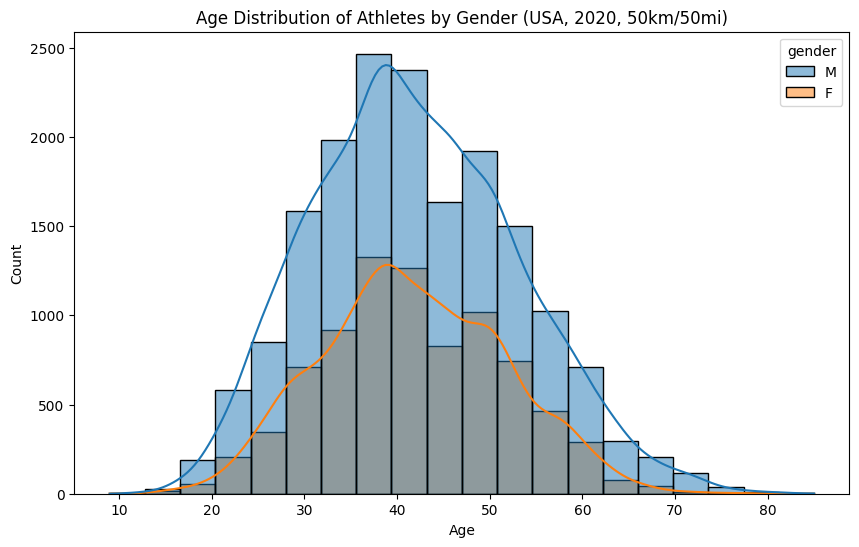

In [39]:
# Age distribution by gender
plt.figure(figsize=(10, 6))
sns.histplot(data=df2, x='athlete_age', hue='gender', bins=20, kde=True)
plt.title('Age Distribution of Athletes by Gender (USA, 2020, 50km/50mi)')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

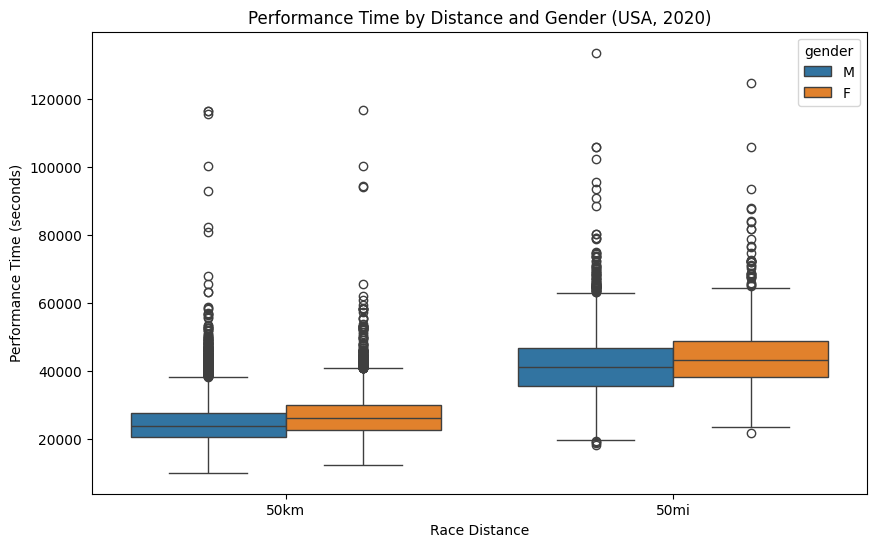

In [40]:
# Performance time by distance
plt.figure(figsize=(10, 6))
sns.boxplot(data=df2, x='distance', y='performance_seconds', hue='gender')
plt.title('Performance Time by Distance and Gender (USA, 2020)')
plt.xlabel('Race Distance')
plt.ylabel('Performance Time (seconds)')
plt.show()

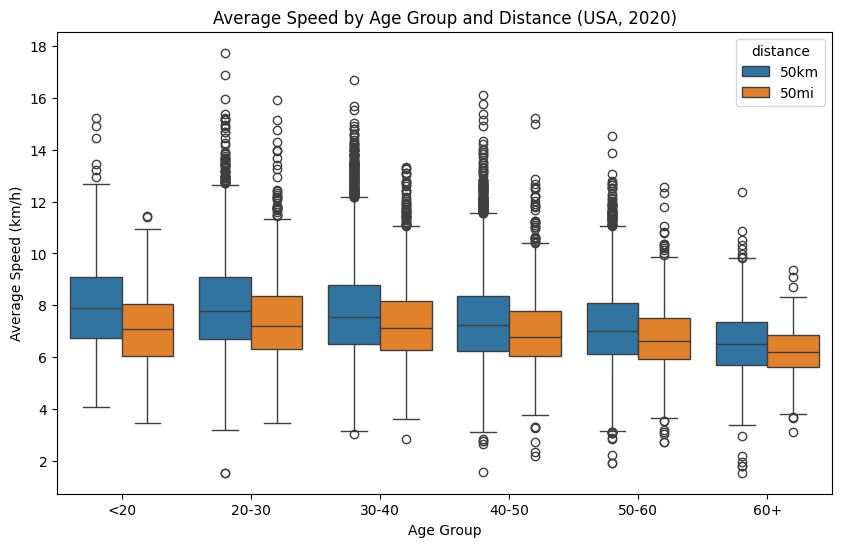

In [41]:
# Average speed by age group
df2['age_group'] = pd.cut(df2['athlete_age'], bins=[0, 20, 30, 40, 50, 60, 100], labels=['<20', '20-30', '30-40', '40-50', '50-60', '60+'])
plt.figure(figsize=(10, 6))
sns.boxplot(data=df2, x='age_group', y='avg_speed', hue='distance')
plt.title('Average Speed by Age Group and Distance (USA, 2020)')
plt.xlabel('Age Group')
plt.ylabel('Average Speed (km/h)')
plt.show()

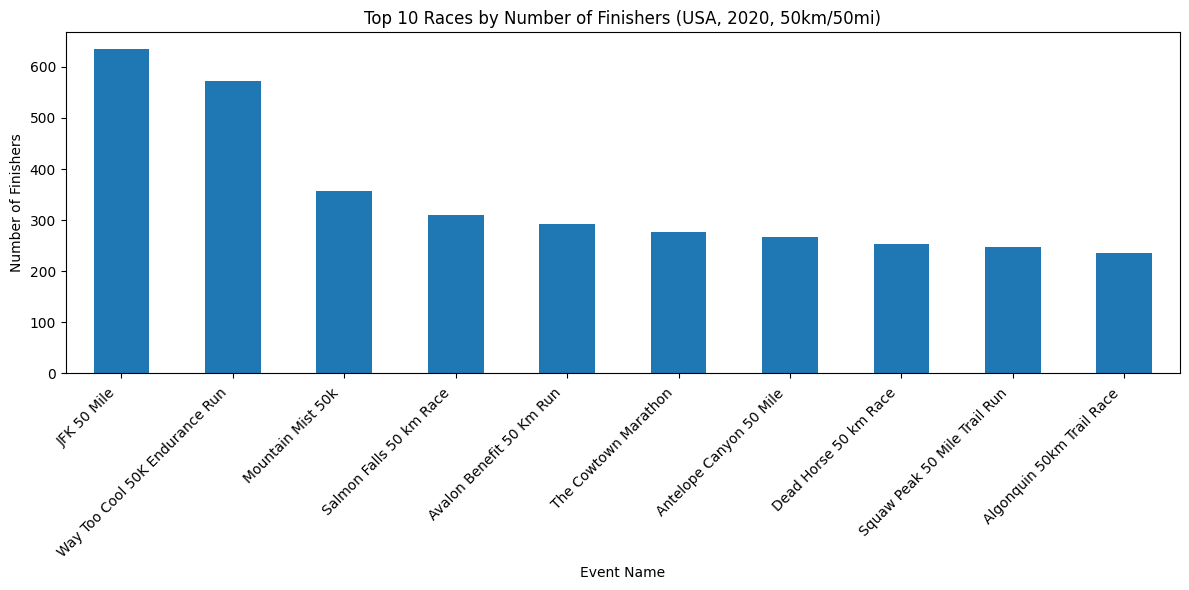

In [42]:
# Top 10 races by number of finishers
top_races = df2.groupby('event_name')['num_finishers'].max().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
top_races.plot(kind='bar')
plt.title('Top 10 Races by Number of Finishers (USA, 2020, 50km/50mi)')
plt.xlabel('Event Name')
plt.ylabel('Number of Finishers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

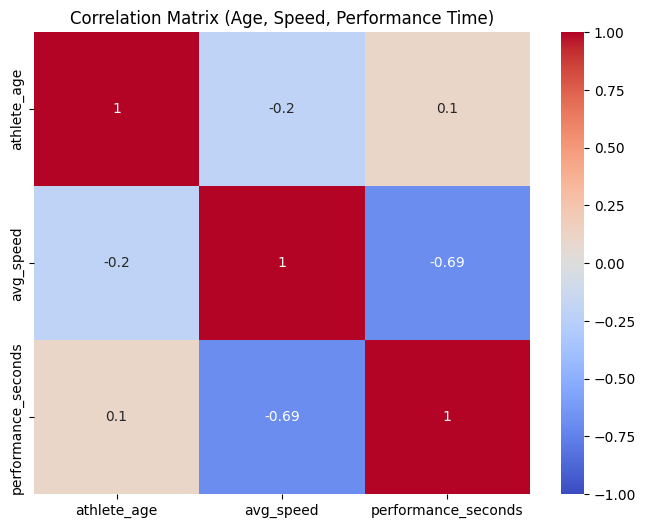

In [43]:
# Correlation between age, speed, and performance
correlation_matrix = df2[['athlete_age', 'avg_speed', 'performance_seconds']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix (Age, Speed, Performance Time)')
plt.show()

In [44]:
## Key Insights

# Age Distribution: The histogram shows the age distribution of athletes, highlighting participation trends by gender.
# Performance by Distance: The box plot reveals differences in performance times between 50km and 50mi races, with potential gender-based variations.
# Speed by Age Group: The box plot indicates how average speed varies across age groups and distances, identifying which groups perform better.
# Popular Races: The bar plot identifies the most popular races by number of finishers, useful for race organizers.
# Correlations: The heatmap shows relationships between age, average speed, and performance time, indicating whether younger/older athletes tend to be faster or slower.